# Практическое задание

#### Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train = tf.image.resize(X_train[..., np.newaxis], (14, 14))[..., 0]
X_test = tf.image.resize(X_test[..., np.newaxis], (14, 14))[..., 0]

In [4]:
X_train.shape

TensorShape([60000, 14, 14])

In [5]:
X_test.shape

TensorShape([10000, 14, 14])

In [6]:
X_train = X_train[:1000]
y_train = y_train[:1000]

X_test = X_test[:100]
y_test = y_test[:100]

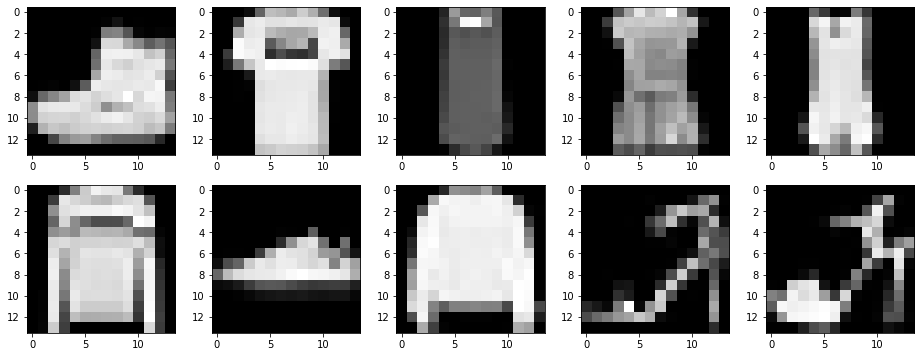

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i,:], cmap='gray')

In [8]:
X_train = X_train.numpy()
X_test = X_test.numpy()

In [9]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train.shape

(1000, 196)

## Обучение модели

In [10]:
%%time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

CPU times: user 661 ms, sys: 437 ms, total: 1.1 s
Wall time: 1.48 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [11]:
pred_train = model.predict(X_train)
pred_train

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 6, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 4, 8, 1, 9, 7, 8,
       8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7,
       7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7,
       0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7,
       0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2,
       9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0,
       8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4,
       4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4, 6, 5, 9, 3, 2, 3, 2, 4,
       4, 8, 2, 5, 3, 0, 7, 2, 0, 2, 5, 7, 2, 3, 1, 7, 6, 2, 9, 1, 9, 1,
       1, 8, 7, 8, 4, 2, 6, 6, 7, 9, 4, 6, 1, 9, 5,

In [12]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,9,9
1,0,0
2,0,0
3,3,3
4,0,0
...,...,...
995,7,7
996,3,3
997,3,3
998,9,9


## Валидация

In [13]:
pred_test = model.predict(
    X_test
)

In [14]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
95,8,8
96,0,0
97,1,1
98,4,4


In [15]:
from sklearn.metrics import accuracy_score

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 0.983
Accuracy модели на тестовой выборке 0.75


## Улучшение качества с помощью полиномиальной модели

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [17]:
%%time
pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
pipe.fit(X_train, y_train)

CPU times: user 29.5 s, sys: 7.28 s, total: 36.8 s
Wall time: 32.7 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

In [18]:
pred_train = pipe.predict(X_train)
pred_train

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5,
       9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2,
       0, 0, 4, 1, 3, 1, 6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7,
       9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8,
       8, 9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6, 4, 1, 8, 7,
       7, 5, 4, 2, 9, 1, 7, 4, 6, 9, 7, 1, 8, 7, 1, 2, 8, 0, 9, 1, 8, 7,
       0, 5, 8, 6, 7, 2, 0, 8, 7, 1, 6, 2, 1, 9, 6, 0, 1, 0, 5, 5, 1, 7,
       0, 5, 8, 4, 0, 4, 0, 6, 6, 4, 0, 0, 4, 7, 3, 0, 5, 8, 4, 1, 1, 2,
       9, 2, 8, 5, 0, 6, 3, 4, 6, 0, 9, 1, 7, 3, 8, 5, 8, 3, 8, 5, 2, 0,
       8, 7, 0, 3, 5, 0, 6, 5, 2, 7, 5, 2, 6, 8, 2, 6, 8, 0, 4, 4, 4, 4,
       4, 1, 5, 6, 5, 3, 3, 7, 3, 3, 6, 2, 8, 4, 6, 5, 9, 3, 2, 3, 2, 4,
       4, 8, 2, 5, 3, 0, 7, 2, 0, 2, 5, 7, 2, 3, 1, 7, 6, 2, 9, 1, 9, 1,
       1, 8, 7, 8, 4, 2, 6, 6, 7, 9, 4, 6, 1, 9, 5,

In [19]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,9,9
1,0,0
2,0,0
3,3,3
4,0,0
...,...,...
995,7,7
996,3,3
997,3,3
998,9,9


## Валидация

In [20]:
pred_test = model.predict(
    X_test
)

In [21]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
95,8,8
96,0,0
97,1,1
98,4,4


In [22]:
from sklearn.metrics import accuracy_score

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 1.0
Accuracy модели на тестовой выборке 0.75


## Сделайте выводы

Модель переобучается